In [19]:
# 신경망은 속도는 느리지만 기능은 좋다
# loss 와 cost 를 줄이는게 목적

import numpy as np

## MSE 구현하기
* 신경망에서의 손실 함수는 정답레이블이 원-핫 인코딩 되어있는 경우에 계산한다

In [27]:
# 모델이 2로 예측했을 확률 0.6 ( 예상값 )
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

# 실제 정답은 2 ( 원-핫 인코딩이 이미 되어있음 ) ( 정답 )
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 이 경우의 Loss를 확인 (MSE 를 이용해서)
len(y), len(t)

(10, 10)

In [28]:
def mean_squared_error(y, t):
  return 0.5 * np.sum((y-t) ** 2)

In [29]:
print("정답을 2로 추정했을때 : {:.3f}".format(mean_squared_error(np.array(y), np.array(t))))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]  # 오답일 값을 출력하니, 오답과 비슷할수록 값은 높아진다.
print("정답을 7로 추정했을때 : {:.3f}".format(mean_squared_error(np.array(y), np.array(t))))

정답을 2로 추정했을때 : 0.098
정답을 7로 추정했을때 : 0.598


In [23]:
## 신경망은 여기서 나오는 오답일 확률 ( = loss ) 을 줄이는데 목적이 있다.

## 교차 엔트로피 오차
* 분류 문제에 있어서는 표준

In [24]:
def cross_entropy_error(y, t):
  delta = 1e-7
  return -np.sum(t * np.log(y + delta))
  
 # le - 7 소수점 7자리까지의 작은 수를 뜻함 

In [25]:
print("정답을 2로 추정했을때 : {:.3f}".format(cross_entropy_error(np.array(y), np.array(t))))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]  # 오답일 값을 출력하니, 오답과 비슷할수록 값은 높아진다.
print("정답을 7로 추정했을때 : {:.3f}".format(cross_entropy_error(np.array(y), np.array(t))))

정답을 2로 추정했을때 : 0.511
정답을 7로 추정했을때 : 2.303


## 수치미분 구현 ( 나쁜 구현 )

In [30]:
def numerical_diff(f, x):   # f는 함수 x는 값
  h = 10e-50
  return (f(x+h) - f(x)) / h   # 미분 구현 공식  

In [33]:
# 나쁜 구현이라고 한 이유는 컴퓨터는 소수점을 표현하는 것에 한계가 있기 때문에 0으로 나와버림 ( 너무 작은 수 )
# 컴퓨터 연산의 특징

print(np.float32(1e-50))

0.0


## 좋은 예

In [35]:
# x 에서 h 만큼을 빼서 그 중간값에 대한 평균을 구해준다.

def  numerical_diff(f, x):
  h = 1e-4  # 0.0001 ( 컴퓨터에서 사용하기 위한 적당한 작은 h의 값 )
  return (f(x+h) - f(x-h)) / (2*h) # 두 점 사이의 중앙값을 사용하기 때문에 2로 나눠진다.

# 위처럼 아주 작은 차분으로 미분하는 것을 수치 미분이라고 한다.

## 수치 미분의 예

In [36]:
# 다음과 같은 2차 함수가 있다고 가정
# y = 0.01x 제곱 + 0.1x

In [37]:
def function_1(x):
    return 0.01*x**2 + 0.1*x 

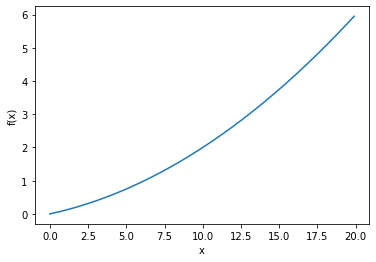

In [38]:
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline

x = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1 간격의 배열을 생성
y = function_1(x)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

In [39]:
print('x가 5일 때 미분값 : {}'.format(numerical_diff(function_1, 5)))
print('x가 10일 때 미분값 : {}'.format(numerical_diff(function_1, 10)))

x가 5일 때 미분값 : 0.1999999999990898
x가 10일 때 미분값 : 0.2999999999986347


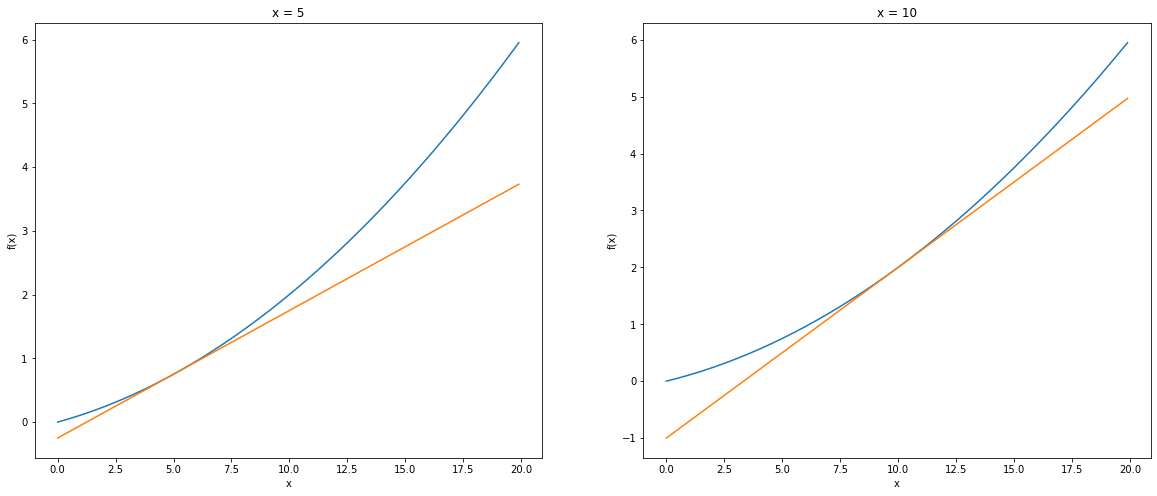

In [40]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    y = f(x) - d*x
    return lambda t: d*t + y

fig, axes = plt.subplots(1,2, figsize=(20,8))

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
axes[0].set_xlabel("x")
axes[0].set_ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

axes[0].plot(x, y)
axes[0].plot(x, y2)
axes[0].set_title("x = 5")

axes[1].set_xlabel("x")
axes[1].set_ylabel("f(x)")

tf = tangent_line(function_1, 10)
y2 = tf(x)

axes[1].plot(x, y)
axes[1].plot(x, y2)
axes[1].set_title("x = 10")
plt.show()

## 편미분
* 한쪽 방향만 고려하면서 미분한다
* 나머지 변수는 전부 상수로 생각하고(무시하고) 미분한다.

In [42]:
def function_2(x):
  return x[0]**2 + x[1]**2
  # 또는 retrun np.sum(x**2)
  

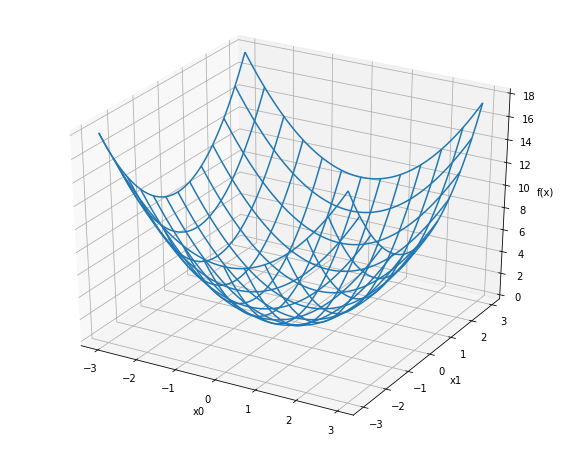

In [43]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

X0 = np.arange(-3, 3, 0.05)
X1 = np.arange(-3, 3, 0.05)

X0, X1 = np.meshgrid(X0, X1)
Z = function_2([X0,X1])

ax.plot_wireframe(X=X0, Y=X1, Z=Z,rstride=10, cstride=10)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('f(x)')
plt.show()

x0 =3, x1 =4 일 때 x0 에 대한 편미분을 구해보자

In [45]:
# x1 = 4 일때의 x0 의 편미분을 구하는 것

def function_tmp1(x0):
  return x0 ** 2 + 4.0 ** 2

In [46]:
numerical_diff(function_tmp1, 3)

6.00000000000378

In [47]:
def function_tmp2(x1):
  return 3.0 ** 2 + x1 **2

In [48]:
numerical_diff(function_tmp1, 4)

7.999999999999119

In [54]:
def function_tmp3(x3):
  return 0.8*5 ** 2  + 0.1*x3 ** 2

In [55]:
numerical_diff(function_tmp3, 3)

0.5999999999950489

In [56]:
def function_tmp4(x4):
  return 0.8*x4 ** 2  + 0.1*3 ** 2

In [57]:
numerical_diff(function_tmp4, 5)

7.999999999981355

In [67]:
# 각 변수에 대한 모든 편미분을 벡터로 정리
# 기울기라고 한다.

def numerical_gradient(f, x):
  h = 1e-4
  # 기울기를 저장할 배열 ( 편미분 값을 벡터로 저장한 것 ) => 기울기
  grad = np.zeros_like(x) # 들어온 x의 개수만큼 0으로 채워진 배열 생성하기

  for idx in range(x.size):
    # 값을 하나씩 꺼내와서
    tmp_val = x[idx]
    # 미분 계산 수행

    # f(x+h) 계산
    x[idx] = tmp_val + h
    fxh1 = f(x)

    # f(x-h) 계산
    x[idx] = tmp_val - h
    fxh2 = f(x)

    #실제 미분 수행
    grad[idx] = (fxh1 - fxh2) / 2*h
    x[idx] = tmp_val # 원래 값으로 복원
  return grad

In [68]:
result = numerical_gradient(function_2, np.array([3.0, 4.0]))
print("x = [3, 4] 일 때의 기울기 배열 : {}".format(result))

result = numerical_gradient(function_2, np.array([0.0, 2.0]))
print("x = [0, 2] 일 때의 기울기 배열 : {}".format(result))

result = numerical_gradient(function_2, np.array([3.0, 0.0]))
print("x = [3, 0] 일 때의 기울기 배열 : {}".format(result))

x = [3, 4] 일 때의 기울기 배열 : [6.e-08 8.e-08]
x = [0, 2] 일 때의 기울기 배열 : [0.e+00 4.e-08]
x = [3, 0] 일 때의 기울기 배열 : [6.e-08 0.e+00]
